In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx

In [8]:
# osmnx.geometries.geometries_from_xml("/home/helge/Applications/osm-data/Manhattan/Test.osm.gz")
node_path = "/home/helge/Documents/osm-data/Berlin/NetworkToPlot3000l.shp_nodes.shp"
link_path = "/home/helge/Documents/osm-data/Berlin/NetworkToPlot3000l.shp_links.shp"
# node_path = "/home/helge/Documents/osm-data/Manhattan/NetworkToPlot1000l.shp_nodes.shp"
# link_path = "/home/helge/Documents/osm-data/Manhattan/NetworkToPlot1000l.shp_links.shp"
nodes = gpd.read_file(node_path)
links = gpd.read_file(link_path)

In [9]:
ny_fsmax = 33.3333333
fsmax = links["freespeed"].max()
print(fsmax)

cmap = plt.get_cmap("viridis")

33.3333


In [10]:
n_coords = np.array([list(*n.coords) for n in nodes["geometry"]])

minx = n_coords[:,0].min()
maxx = n_coords[:,0].max()
miny = n_coords[:,1].min()
maxy = n_coords[:,1].max()

In [11]:
print((maxy-miny)/(maxx-minx))

0.7583934933642493


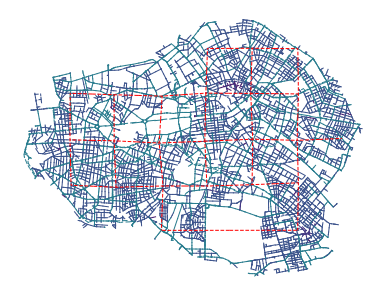

In [13]:
%matplotlib inline
fig, ax = plt.subplots(constrained_layout=True)

# for n in nodes["geometry"]:
#     print(list(n.coords))
#     break

counter = 0
for _,link in links.iterrows():
    l = link["geometry"]
    f = link["freespeed"]
    ll = list(l.coords)
    counter += 1
    if "pt" not in link["ID"]:
#         ax.plot([ll[0][0],ll[1][0]], [ll[1][1],ll[2][1]], c=cmap(f/ny_fsmax), lw=1, zorder=-1)
        ax.plot([ll[1][0],ll[2][0]], [ll[1][1],ll[2][1]], c=cmap(f/ny_fsmax), lw=1, zorder=-2)
    else:
#         ax.plot([ll[0][0],ll[1][0]], [ll[1][1],ll[2][1]], c="red", ls="--", lw=1, zorder=-1)
        ax.plot([ll[1][0],ll[2][0]], [ll[1][1],ll[2][1]], c="red", ls="--", lw=1, zorder=-1)
#     if counter >= 1000:
#         break

# ax.set_aspect((maxy-miny)/(maxx-minx))
ax.axis("off")
ax.set_rasterization_zorder(0)
ax.set_aspect(1)
# fig.colorbar(ax=ax)

# fig.savefig("Figures/BerlinLinksSpeeds3000l.pgf", dpi=600, bbox_inches='tight')
# fig.savefig("Figures/BerlinLinksSpeeds3000l.jpg", dpi=600, bbox_inches='tight')
plt.show()

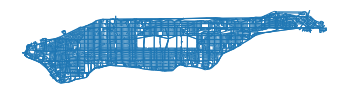

In [43]:
fig, ax = plt.subplots()#figsize=(6.4,4.8))

# nodes.plot(ax=ax, markersize=1)
links.plot(ax=ax, linewidth=1)
ax.axis("off")

# fig.savefig("Figures/ManhattanLinks.pgf")
plt.show()